##### Dependencies
____

In [13]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
import json

from itertools import combinations 

%matplotlib inline

sns.set(style="whitegrid")

##### Constants
_____

In [14]:
INFECTED = 1
UNINFECTED = 0

##### Variables
____

In [15]:
computers = 20
initial_infection = 1
prob = 0.1
tech_threshold = 5
total_simulations = 1

##### Functions
_____

In [16]:
def is_network_clear(network):
    for item in network:
        if item['state'] == INFECTED:
            return False
        
    return True    

In [17]:
def print_network(network):
    for item in network:
        print(item)

In [18]:
def setComputerState(network, id, state):
    for item in network:
        if item['computer'] == id:
            
            if (item['state'] == UNINFECTED):
                item['infections'] += 1
                
            elif (item['state'] == INFECTED):
                item['recovers'] += 1
                
            item['state'] = state
            
            break

In [19]:
def clearRandomNetwork(network, fromState, toState, count):
    total = 0
    
    infected = [item for item in network if item['state'] == fromState]
    
    if len(infected) > count:
        for item in random.sample(infected, k=count):
            setComputerState(network, item['computer'], toState)
    else:
        for item in infected:
            setComputerState(network, item['computer'], toState)
            

In [20]:
def bernoulli(p):
    random_number = random.random()
    
    return (1 if random_number <= p else 0)

##### Model
_____

In [21]:
simulations = []

for simulation in range(total_simulations):
    # construct network
    network = [{'computer' : id, 'state' : UNINFECTED, 'infections': 0, 'recovers' : 0} for id in range(0, computers)]
    days = None
    
    # initial infection (random)
    for _ in range(initial_infection):
        setComputerState(network, random.randrange(0, len(network), step=1), INFECTED)        
        
    # network_clear loop        
    while (not is_network_clear(network)):
        if (days is None):
            days = 0
        else:
            days += 1

        # spread the virus across uninfected computers
        # this virus spreads from any infected computer to any uninfected
        infected = [item for item in network if item['state'] == INFECTED]            

        for _ in infected:
            uninfected = [item for item in network if item['state'] == UNINFECTED]

            for item in uninfected:
                if (np.random.binomial(n=1, p=prob, size=1)[0] == INFECTED):
                #if (bernoulli(prob) == INFECTED):
                    setComputerState(network, item["computer"], INFECTED)


        # computer technician arrives, finds a new_k number of infected computers
        clearRandomNetwork(network, INFECTED, UNINFECTED, tech_threshold) 

    # save results    
    distinct_infections = sum([1 for item in network if item['infections'] > 0])

    simulations.append({
        'simulation' : simulation,
        'days'       : days,
        'infected'   : distinct_infections,
        'uninfected' : computers - distinct_infections
    })


##### Results
_____

In [22]:
summary = pd.DataFrame(data=simulations, columns=list(simulations[0].keys()))

summary

,simulation,days,infected,uninfected
0,0,0,4,16


In [23]:
expected_days = summary['days'].max()/total_simulations

cond = summary['infected'] == 20
p = summary[cond].count()[0]/total_simulations

expected_computers = summary['infected'].sum()/total_simulations

print(f"The expected time it takes to remove the virus from the whole network : {math.ceil(expected_days)} day(s)")
print(f"The probability that each computer gets infected at least once : {p}")
print(f"The expected number of computers that get infected : {math.ceil(expected_computers)}")

The expected time it takes to remove the virus from the whole network : 0 day(s)
The probability that each computer gets infected at least once : 0.0
The expected number of computers that get infected : 4


##### Visualizations
_____

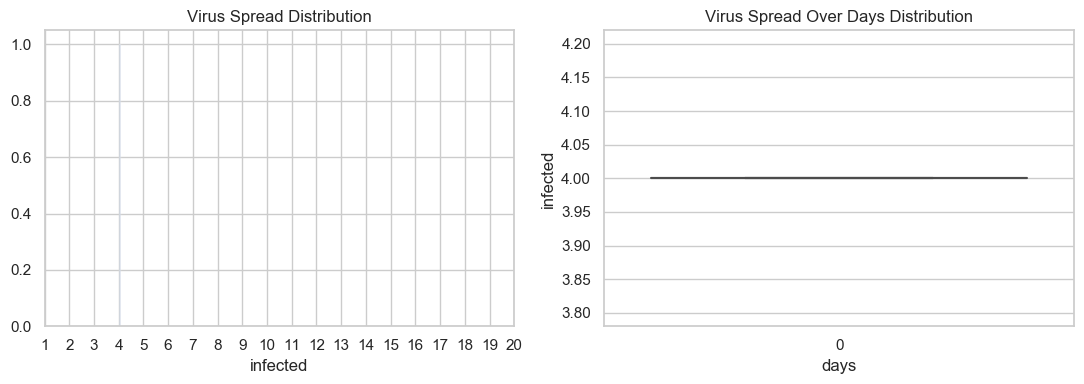

In [12]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(11,4), dpi=100)

axes[0].set_title('Virus Spread Distribution')

sns.distplot(summary['infected'], kde=False,ax=axes[0],bins=computers);
axes[0].set_xticks(list(range(1,computers + 1)))

# removing outliers
#Q1 = summary.quantile(0.25)
#Q3 = summary.quantile(0.75)
#IQR = Q3 - Q1

#cond1 = summary['days'] < (Q1 - 1.5 * IQR)
#cond2 = summary['days'] > (Q3 + 1.5 * IQR)
#summary[cond1 & cond2]

axes[1].set_title('Virus Spread Over Days Distribution')
sns.boxplot(x='days', data=summary, ax=axes[1],y='infected')


plt.tight_layout()

In [169]:
#Q1 = summary['days'].quantile(0.25)
#Q3 = summary['days'].quantile(0.75)
#IQR = Q3 - Q1

#cond1 = summary['days'] < (Q1 - 1.5 * IQR)
#cond2 = summary['days'] > (Q3 + 1.5 * IQR)
#summary[cond1 & cond2]

#summary['days'].quantile(1.0)

In [133]:
cond = summary['days'] > 1
summary[cond]


#cond = summary['simulation'] == 3301
#summary[cond]

,simulation,days,infected,uninfected
16,16,2,10,10
45,45,1117377,20,0
436,436,5,16,4
450,450,2,14,6
901,901,3,14,6


In [141]:
summary.quantile(0.75)

simulation    749.25
days            0.00
infected        4.00
uninfected     18.00
Name: 0.75, dtype: float64

In [ ]:
### b the probability that each computer gets infected at least once
  # count ( infected = 20 / total simulations)
    
    
# a)  the expected time it takes to remove the virus from the whole network
## number of days /total simulations - avg number of days

## c) the expected number of computers that get infected
### sum(infected)/ total simulations

    

In [ ]:
def binomial(item):
    c = math.factorial(computers)/(math.factorial(tech_threshold)*math.factorial(computers-tech_threshold))
    p = pow(item['p'], tech_threshold)
    q = pow(item['q'], (computers - tech_threshold))
    
    return c * p * q